<a href="https://colab.research.google.com/github/pmilks/cap-comp215/blob/main/COMP215%20-%20Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Small World Graphs: Watts & Strogatz

Recalling previous lessons on graph theory, covering random and regular graphs and their connectivity (*Reminder on graph theory from Wolfram: [Graphs](https://mathworld.wolfram.com/Graph.html), [Random](https://mathworld.wolfram.com/RandomGraph.html), [Regular](https://mathworld.wolfram.com/RegularGraph.html), [Connectivity](https://mathworld.wolfram.com/ConnectedGraph.html)*), we observed how these graphs could be for modeling certain real-world behaviours, like graphing distances between locations or simple relationships. These simple graphs however fail to correctly model more complex real-world relationships, like social networks.

Duncan Watts & Steven Strogatz, sociologist and mathematician respectively, published: *“Collective dynamics of ‘small-world’ networks"* in 1998 that proposed an explanation and model for small world phenomenon including social networking. 

In [114]:
from networkx.generators import erdos_renyi_graph
from networkx.generators.random_graphs import random_regular_graph
import networkx as nx
import matplotlib.pyplot as plt 
import numpy as np 
from pprint import pprint

## Properties of graphs:


### I) Clustering
Clustering is the measure of "*cliqueness*" of a graph, where a clique is defined as being a subset of connected nodes, much like a clique of friends.

They defined a clustering coefficient to quantify the likelihood two nodes that share a common direct neighbour are also connected.

NetworkX has clustering functions built into their library to determine the clustering of a single node or an entire graph, but let's see how they might work.

Lets create an Erdos Renyi graph of size *n* with probability *p* to explore these properties.

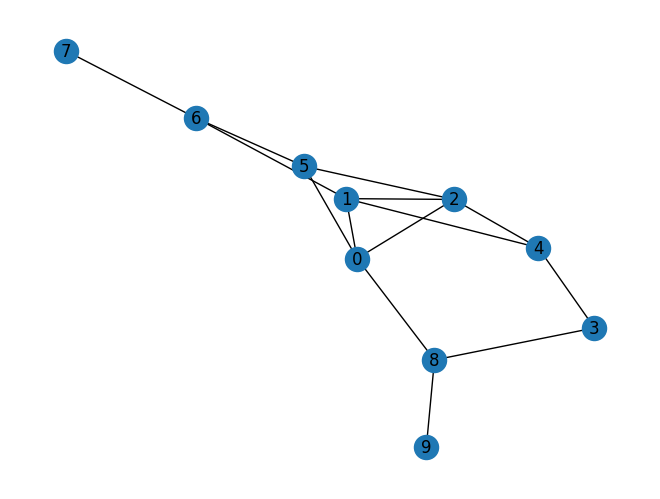

In [85]:
G=erdos_renyi_graph(10,0.2)
nx.draw(G, with_labels=True)

In [74]:
def node_cluster(graph,node):
  '''
  Returns the cluster coefficient of a node by calculating the number of edges
  of its neighbors and dividing it by the maximum number of edges possible
  '''
  subg = nx.subgraph(graph, set(graph.neighbors(node))-set([node]))
  if len(subg.nodes) == 0:
    return 0
  triangular_num = (((len(subg.nodes)-1)**2)+(len(subg.nodes)-1))/2
  '''The triangular number is a series that determines the maximum number 
  of edges possible'''
  return len(subg.edges)/triangular_num

def graph_cluster(graph):
  '''
  Returns the cluster coefficient for a graph by averaging node_cluster
  over the number of nodes in the graph
  '''
  total_nc = [node_cluster(graph,node) for node in list(graph.nodes)]
  return sum(total_nc)/len(graph.nodes)

# Cluster coefficient for node
clusters = {node:node_cluster(G,node) for node in list(G.nodes)}
print(f"Local clusters: {clusters}")

# Cluster coefficient for graph
print(f"Global cluster: {graph_cluster(G)}")

Local clusters: {0: 0.5, 1: 0.6666666666666666, 2: 0.8333333333333334, 3: 0.4666666666666667, 4: 0.3333333333333333, 5: 0.3333333333333333, 6: 0.6666666666666666, 7: 0.0, 8: 0.2, 9: 0.3333333333333333}
Global cluster: 0.4333333333333333


In comparison to the NetworkX library methods:

In [75]:
# Cluster coefficient for node
clusters = nx.clustering(G)
print(f"Local clusters: {clusters}")

# Cluster coefficient for graph
graph_cluster = nx.average_clustering(G)
print(f"Global cluster: {graph_cluster}")

Local clusters: {0: 0.5, 1: 0.6666666666666666, 2: 0.8333333333333334, 3: 0.4666666666666667, 4: 0.3333333333333333, 5: 0.3333333333333333, 6: 0.6666666666666666, 7: 0, 8: 0.2, 9: 0.3333333333333333}
Global cluster: 0.4333333333333333


### II) Path Length
Path length is the shortest distance, measured in degrees of seperation, between two nodes. This calculation is quite complex and taxing so we will use the methods already written in NetworkX.

In [106]:
def all_path_length(graph):
  '''
  Returns a dictionary of all unique node pairs (ex. (2,1) & (1,2) NOT unique)
  and the path length between them
  '''
  # If graph is connected then no there are path-lengths of 0

  all_pair_dist = dict(nx.all_pairs_shortest_path_length(graph))
  pair_len = {}
  for origin_node in all_pair_dist.keys():
    for end_node in all_pair_dist[origin_node].keys():
      if all_pair_dist[origin_node][end_node] != 0 and end_node > origin_node:
        pair_len[(origin_node,end_node)] = all_pair_dist[origin_node][end_node]
  return pair_len

def avg_path_length(all_pls):
  '''
  Returns average path length
  '''
  return sum(all_pls.values())/len(all_pls)

# Average path length
print(f"Average path length: {avg_path_length(all_path_length(G))}")

Average path length: 2.111111111111111


## Clustering & Path Lengths of Graphs
With these new properties to measure graphs, lets see how they quantify Erdos Renyi graph with varying probability up to a complete graph.

Erdos Renyi Graphs:

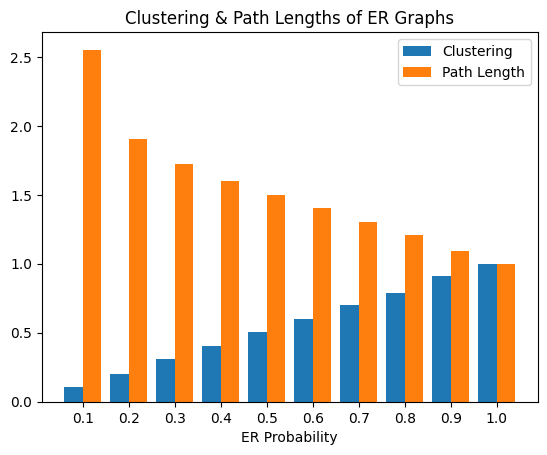

In [132]:
cluster_path = {}
for i in range(1,11):
  er_graph = erdos_renyi_graph(50,i/10)
  cluster_path[i/10] = (nx.average_clustering(er_graph), avg_path_length(all_path_length(er_graph)))

clusters = [data[0] for data in cluster_path.values()]
path_lengths = [data[1] for data in cluster_path.values()]

x_axis = np.arange(10)
plt.bar(x_axis-0.2, clusters, 0.4, label='Clustering')
plt.bar(x_axis+0.2, path_lengths, 0.4, label='Path Length')
plt.xticks(x_axis, cluster_path.keys())
plt.xlabel('ER Probability')
plt.title('Clustering & Path Lengths of ER Graphs')
plt.legend()
plt.show()

Random Regular Graphs:

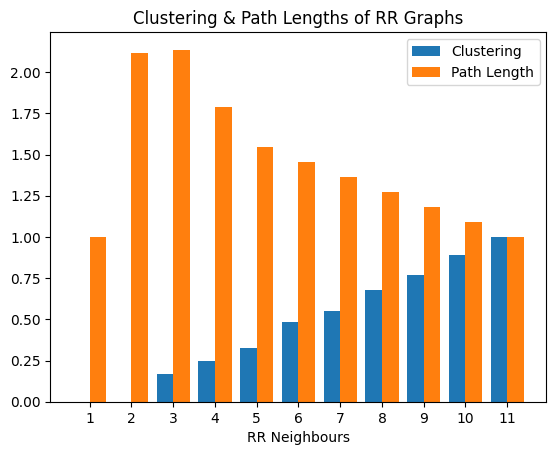

In [152]:
cluster_path = {}
for d in range(1,12):
  rr_graph = random_regular_graph(d,12)
  cluster_path[d] = (nx.average_clustering(rr_graph), avg_path_length(all_path_length(rr_graph)))

clusters = [data[0] for data in cluster_path.values()]
path_lengths = [data[1] for data in cluster_path.values()]

x_axis = np.arange(11)
plt.bar(x_axis-0.2, clusters, 0.4, label='Clustering')
plt.bar(x_axis+0.2, path_lengths, 0.4, label='Path Length')
plt.xticks(x_axis, cluster_path.keys())
plt.xlabel('RR Neighbours')
plt.title('Clustering & Path Lengths of RR Graphs')
plt.legend()
plt.show()

For both the Erdos-Renyi & random regular graphs, there are clear relationships between clustering and path length with probabilities or degrees respectively. At small probabilities and degrees, clustering is low and path-lengths are high. At values increase, clustering rises as path lengths fall tending towards 1 when reaching complete graph state.

But Watts & Strogatz knew human social network were categorized with inversely, with clustering being high at short path lengths.

## Watts-Strogatz Experiment
The Watts-Strogatz experiment to model social networks was made as follows:


Firstly, a ring lattice is created and among the subsets of edges (cliques), at a probability *p*, they are rewired (addressed to random nodes).

Lets begin by making a ring lattice. A ring lattice is a regular graph, which means each node will have the same number of neighbors (*defined as degree*), arranged circularly. A node's neighbors are also nodes nearest to it.


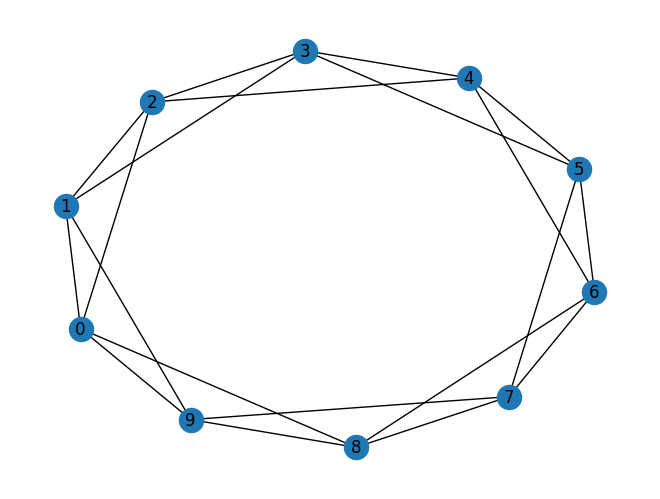

In [149]:
def adjacent_edges(nodes, k):
  '''
  Generator that returns an edge path through all nodes
  wrapping around and edges between nodes their (k/2)+1 adjacent
  neighbours
  '''
  # k must be >= 4 for neighbor edges to appear

  n = len(nodes)
  for i, u in enumerate(nodes):
    for j in range(i+1, i+(k//2)+1):
      v = nodes[j % n]
      yield u, v

def make_ring_lattice(n, k):
  '''
  Returns a ring lattice of size n with edges between k+1
  adjacent neighbours
  '''
  G = nx.Graph()
  nodes = range(n)
  G.add_nodes_from(nodes)
  G.add_edges_from(adjacent_edges(nodes, k))
  return G

#Source: On Complexity by Janice L. Pearce (Chap. 5.4)

# Ring Lattice of size = 10 and k = 4
lat = make_ring_lattice(10,4)
nx.draw(lat, with_labels=True)

Now some edges must be rewired at probability *p* to another random node. If an edge is selected to be rewired:
*   The new end node cannot be the origin node
*   The new edge cannot already exist


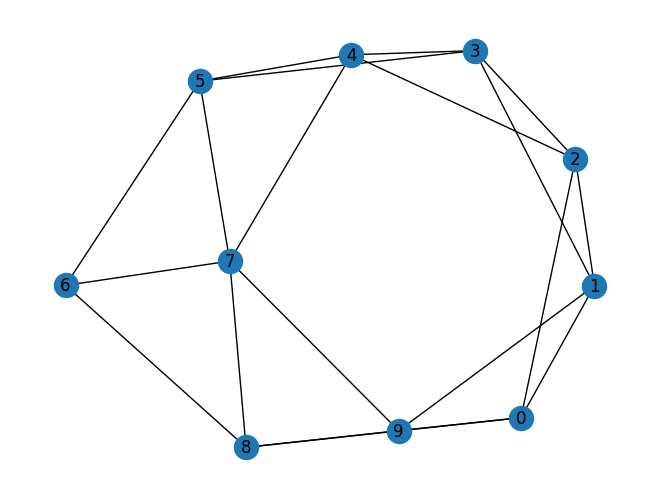

In [150]:
def rewire(graph, p):
  '''
  At probability p, changes the end point of an edge to a node without looping
  on itself or creating a duplicate node
  '''
  for origin, end in graph.edges:   
    if np.random.random() < p:
      possible_ends = set(graph.nodes) - set(graph.neighbors(origin)) - {origin}
      graph.add_edge(origin, np.random.choice(list(possible_ends)))
      graph.remove_edge(origin, end)

# Rewired Ring Lattice
rewire(lat, 0.01)
nx.draw(lat, with_labels=True)

With the ability to create and rewire ring lattices, lets see how the properties differs as the value of the probability changes.

{0.1: (0.5316615155379771, 3.240644644644645), 0.2: (0.3711168281605234, 2.9304024024024025), 0.3: (0.25941883668793325, 2.8056836836836836), 0.4: (0.15858170767207372, 2.73012012012012), 0.5: (0.10361913855223023, 2.695043043043043), 0.6: (0.06083269116630804, 2.6684104104104103), 0.7: (0.03662817345456689, 2.6524584584584585), 0.8: (0.024122725203234826, 2.644088088088088), 0.9: (0.019089669166227955, 2.641165165165165), 1.0: (0.01872386541224913, 2.6415675675675674)}


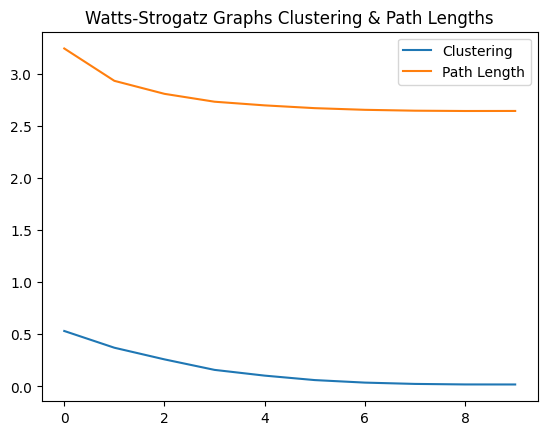

In [165]:
cluster_path = {}
for i in range(1,11):
  lat = make_ring_lattice(1000,20) # Lattice of size 1000 with 20 adjacent neighbour edges
  rewire(lat, i/10)
  cluster_path[i/10] = (nx.average_clustering(lat), avg_path_length(all_path_length(lat)))
  
clusters = [data[0] for data in cluster_path.values()]
path_lengths = [data[1] for data in cluster_path.values()]

plt.plot(clusters, label='Clustering')
plt.plot(path_lengths, label='Path Length')
plt.title('Watts-Strogatz Graphs Clustering & Path Lengths')
plt.legend()
plt.show()

It seems like Watts-Strogatz model is successful with changes of probability having the desired effect on clustering and path length. Moments of high clustering are matched with longer path lengths and the opposite is true at low values, according to the dynamics of social networks.

Path length tended towards ~2.5.

Cluster coefficient tended towards 0.

We also remark that path length drops much more sharply than the clustering coefficient as the probability rises. This means there are still periods at which clustering is still relative high and path lengths are almost at their smallest.

With similar sets of data, Watts and Strogatz proposed Watts-Strogatz as a real-world model that exhibits [small world phenomenon](https://en.wikipedia.org/wiki/Small-world_experiment).

## Reflection
The Watts-Strogatz experiment may feel like its results and conclusion are less tangible than previous explored model. It feels more like a proof of previous findings on social networks rather than predicting behaviour.

**This work was more explanatory than it was predictive.**

The experiment also can't be simplified into a mathematical formula and was explained through simulation.

**This work is simulation-based rather than mathematical modelling.**

It is a good introduction into much of the work involved in computational sciences and how it can differ from traditional scientific work.